## Skygeni Assignment 

#### Submitted by Jeevana Sree B (12220183)

I have been given 4 csv files - `subscribtion_information.csv`,`payment_information.csv`,`industry_clients_details.csv` and `finanical_information.csv`. This assignment involves analyzing this four datasets to derive meaningful insights and find answers to the given questions.

### Importing necessary libraries

In [178]:
import pandas as pd # data handling and manipulation
import matplotlib.pyplot as plt # Basic Visualization
import seaborn as sns # Advanaced Visualization

### Loading Data 

In [93]:
finanical_df = pd.read_csv('finanical_information.csv')
industry_df = pd.read_csv('industry_client_details.csv')
payments_df = pd.read_csv('payment_information.csv')
subscription_df = pd.read_csv('subscription_information.csv')

### Data Inspection and Cleaning

#### 1. Finanical Data

In [52]:
# display the first 5 rows
finanical_df.head()

,Unnamed: 0,start_date,end_date,inflation_rate,gdp_growth_rate
0,0,2018-01-01,2018-03-31,5.77,3.51
1,1,2018-04-01,2018-06-30,1.17,2.15
2,2,2018-07-01,2018-09-30,1.56,1.82
3,3,2018-10-01,2018-12-31,2.78,2.43
4,4,2019-01-01,2019-03-31,6.91,3.44


In [53]:
# No of rows and columns
finanical_df.shape

(21, 5)

In [54]:
# information about dataframe
finanical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       21 non-null     int64  
 1   start_date       21 non-null     object 
 2   end_date         21 non-null     object 
 3   inflation_rate   21 non-null     float64
 4   gdp_growth_rate  21 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 968.0+ bytes


In [55]:
# to check columns
finanical_df.columns.tolist()

['Unnamed: 0', 'start_date', 'end_date', 'inflation_rate', 'gdp_growth_rate']

In [56]:
# Statistical summary
finanical_df.describe()

,Unnamed: 0,inflation_rate,gdp_growth_rate
count,21.000000,21.000000,21.000000
mean,10.000000,4.426667,2.345238
std,6.204837,2.245801,0.952747
min,0.000000,0.760000,1.040000
25%,5.000000,2.710000,1.360000
50%,10.000000,4.400000,2.400000
75%,15.000000,6.760000,3.440000
max,20.000000,7.710000,3.630000


- the finanical data contains 21 rows and 5 columns
- `start_date` and `end_date` says about the finanical periods (in string data type)
- `inflation_rate` and `gdp_growth_rate` represents the inflation and gdp growth during the financial periods
- `unnamed` it looks like the index column of the data frame

In [57]:
# Check for any missing values
finanical_df.isnull().sum()

Unnamed: 0         0
start_date         0
end_date           0
inflation_rate     0
gdp_growth_rate    0
dtype: int64

In [58]:
# check for duplicate values
duplicate_count = finanical_df.duplicated().sum()
duplicate_count

0

There are no missing values and duplicate values.<br> 
So, we can move on the handle `unnamed: 0` column and converting `start_date`, `end_date` columns into datetime format

In [59]:
# Since unnamed column also says about the index of the data frame it better to remove the unncessary column
# removing 'unnamed: 0' column
finanical_df.drop(columns=['Unnamed: 0'], inplace=True)

**inplace = True** modifies the original dataframe directly instead of creating a new one.

In [60]:
# Convert 'start_date' and 'end_date' columns to datetime format
finanical_df['start_date'] = pd.to_datetime(finanical_df['start_date'])
finanical_df['end_date'] = pd.to_datetime(finanical_df['end_date'])

In [114]:
# Ensure 'inflation_rate' and 'gdp_growth_rate' are clean floats column
finanical_df['inflation_rate'] = pd.to_numeric(finanical_df['inflation_rate'], errors='coerce')
finanical_df['gdp_growth_rate'] = pd.to_numeric(finanical_df['gdp_growth_rate'], errors='coerce')

In [61]:
# Show the cleaned DataFrame info and first few rows
finanical_df.info(), finanical_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   start_date       21 non-null     datetime64[ns]
 1   end_date         21 non-null     datetime64[ns]
 2   inflation_rate   21 non-null     float64       
 3   gdp_growth_rate  21 non-null     float64       
dtypes: datetime64[ns](2), float64(2)
memory usage: 800.0 bytes


(None,
   start_date   end_date  inflation_rate  gdp_growth_rate
 0 2018-01-01 2018-03-31            5.77             3.51
 1 2018-04-01 2018-06-30            1.17             2.15
 2 2018-07-01 2018-09-30            1.56             1.82
 3 2018-10-01 2018-12-31            2.78             2.43
 4 2019-01-01 2019-03-31            6.91             3.44)

#### 2. Industry Clienta Dataset

In [62]:
# show first 5 rows()
industry_df.head()

,client_id,company_size,industry,location
0,4280387012,Large,Finance Lending,Mumbai
1,2095513148,Small,Finance Lending,Chennai
2,7225516707,Medium,Finance Lending,New Delhi
3,8093537819,Large,Block Chain,Mumbai
4,4387541014,Medium,Hyper Local,Banglore


In [63]:
# information about dataset
industry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   client_id     100 non-null    int64 
 1   company_size  100 non-null    object
 2   industry      100 non-null    object
 3   location      100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.2+ KB


In [64]:
# No of rows and Columns
industry_df.shape

(100, 4)

The datset contains 100 rows and 4 columns

In [65]:
# Checking for missing values
industry_df.isnull().sum()

client_id       0
company_size    0
industry        0
location        0
dtype: int64

In [66]:
# checking for duplicates 
industry_df.duplicated().sum()

0

In [67]:
# Ensures consistency across datasets during merging, even if already int64
industry_df['client_id'] = industry_df['client_id'].astype('int64')  

In [68]:
# Cleaning categorical columns to remove whitespace and standardize format using title case
industry_df['industry'] = industry_df['industry'].str.strip().str.title()
industry_df['company_size'] = industry_df['company_size'].str.strip().str.title()
industry_df['location'] = industry_df['location'].str.strip().str.title()

In [69]:
# Display Cleaned Dataset
industry_df.head()

,client_id,company_size,industry,location
0,4280387012,Large,Finance Lending,Mumbai
1,2095513148,Small,Finance Lending,Chennai
2,7225516707,Medium,Finance Lending,New Delhi
3,8093537819,Large,Block Chain,Mumbai
4,4387541014,Medium,Hyper Local,Banglore


In [72]:
# Categorical Value Distribution

# Company size distribution
print("\nCompany Size Distribution:")
print(industry_df['company_size'].value_counts())

# Industry distribution
print("\nIndustry Distribution:")
print(industry_df['industry'].value_counts())

# Location distribution
print("\nLocation Distribution:")
print(industry_df['location'].value_counts())


Company Size Distribution:
Small     39
Medium    32
Large     29
Name: company_size, dtype: int64

Industry Distribution:
Block Chain        25
Finance Lending    22
Gaming             22
Hyper Local        20
Ai                 11
Name: industry, dtype: int64

Location Distribution:
Hyderabad    23
Chennai      20
New Delhi    20
Banglore     20
Mumbai       17
Name: location, dtype: int64


Information about the columns
1. `client_id` - it represents unique value assigned to each client ( PRIMARY KEY)
2. `company_size` - indicates the scale of company (small, medium and large sacles)
3. `industry` - information about the sector or industry the client operates
4. `location` - Says about the city the client is located

The industry dataset thave no missing values, no duplicates. I have cleaned categorical columns to remove whitespace and standardize format using title case. 

How many finance lending and blockchain clients does the organization have?
The organisation have 25 Block Chain Clients and 22 Finance Lending Clients. (Check in the Value counts)

#### 3. Subscription Information Dataset

In [78]:
# display first 5 rows
subscription_df.head()

,client_id,subscription_type,start_date,end_date,renewed
0,1131383004,Yearly,2020-11-11,2021-11-11,False
1,4309371709,Monthly,2021-05-24,2021-06-23,True
2,3183675157,Yearly,2021-12-25,2022-12-25,True
3,5371694837,Monthly,2020-03-14,2020-04-13,True
4,5157113076,Monthly,2019-11-07,2019-12-07,False


In [83]:
# no of rows and Columns
subscription_df.shape

(100, 5)

In [80]:
# information about dataset
subscription_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   client_id          100 non-null    int64 
 1   subscription_type  100 non-null    object
 2   start_date         100 non-null    object
 3   end_date           100 non-null    object
 4   renewed            100 non-null    bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 3.3+ KB


In [84]:
# Checking for missing values
subscription_df.isnull().sum()

client_id            0
subscription_type    0
start_date           0
end_date             0
renewed              0
dtype: int64

In [85]:
# checking for duplicate values
subscription_df.duplicated().sum()

0

In [86]:
# Ensure client_id is of type int64
subscription_df['client_id'] = subscription_df['client_id'].astype('int64')

In [87]:
# Convert start_date and end_date columns to datetime format
subscription_df['start_date'] = pd.to_datetime(subscription_df['start_date'])
subscription_df['end_date'] = pd.to_datetime(subscription_df['end_date'])

In [91]:
# Verify data types after cleaning
print("\nData Types After Cleaning:")
print(subscription_df.dtypes)


Data Types After Cleaning:
client_id                     int64
subscription_type            object
start_date           datetime64[ns]
end_date             datetime64[ns]
renewed                        bool
dtype: object


In [97]:
# Subscription Types distribution
print("\nSubscribtion type count:")
print(subscription_df['subscription_type'].value_counts())

# Renewed or Not Distribution
print("\nRenewal Count:")
print(subscription_df['renewed'].value_counts())



Subscribtion type count:
Monthly    57
Yearly     43
Name: subscription_type, dtype: int64

Renewal Count:
True     55
False    45
Name: renewed, dtype: int64


In [90]:
# Display cleaned dataset
subscription_df.head()

,client_id,subscription_type,start_date,end_date,renewed
0,1131383004,Yearly,2020-11-11,2021-11-11,False
1,4309371709,Monthly,2021-05-24,2021-06-23,True
2,3183675157,Yearly,2021-12-25,2022-12-25,True
3,5371694837,Monthly,2020-03-14,2020-04-13,True
4,5157113076,Monthly,2019-11-07,2019-12-07,False


#### Summary

1. `client_id` - Unique ID for each client (used to link with other datasets)
2. `subscription_type` - Type of subscription (`Monthly` or `Yearly`)
3. `start_date` - Date when the subscription started
4. `end_date` - Date when the subscription ended
5. `renewed` - `True` if the client renewed the subscription, else `False`

The subscription dataset has no missing and duplicate values. And converted start_date, end_date columns into datetime format

#### 4. Payments Datset

In [94]:
# show first 5 rows
payments_df.head()

,client_id,payment_date,amount_paid,payment_method
0,6292156167,9/16/2019,447.0,Bank Transfer
1,7462725203,5/21/2018,379.7,Bank Transfer
2,4698004907,9/11/2021,435.1,Check
3,3510240337,12/7/2020,413.1,Check
4,7501599785,3/4/2019,61.1,Bank Transfer


In [98]:
# Information about datset
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       100 non-null    int64  
 1   payment_date    100 non-null    object 
 2   amount_paid     100 non-null    float64
 3   payment_method  100 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ KB


In [99]:
# checking shape
payments_df.shape

(100, 4)

In [100]:
# Checking for null values
payments_df.isnull().sum()

client_id         0
payment_date      0
amount_paid       0
payment_method    0
dtype: int64

In [101]:
# Checking for duplicate values
payments_df.duplicated().sum()

0

In [103]:
# Ensure client_id is of type int64
payments_df['client_id'] = payments_df['client_id'].astype('int64')

In [104]:
# Convert payment_date to datetime format
payments_df['payment_date'] = pd.to_datetime(payments_df['payment_date'])

In [105]:
# Clean and standardize payment_method (strip spaces, apply title case)
payments_df['payment_method'] = payments_df['payment_method'].str.strip().str.title()

In [106]:
# Ensure amount_paid is a clean float column
payment_df['amount_paid'] = pd.to_numeric(payment_df['amount_paid'], errors='coerce')

In [107]:
# Verify data types after cleaning
payment_df.dtypes

client_id           int64
payment_date       object
amount_paid       float64
payment_method     object
dtype: object

In [110]:
# Payments Method Distribution
print("\nTypes of payment methods:")
print(payments_df['payment_method'].value_counts())


Types of payment methods:
Bank Transfer    38
Check            31
Credit Card      31
Name: payment_method, dtype: int64


In [111]:
# Display Cleaned Data Set
payment_df.head()

,client_id,payment_date,amount_paid,payment_method
0,6292156167,9/16/2019,447.0,Bank Transfer
1,7462725203,5/21/2018,379.7,Bank Transfer
2,4698004907,9/11/2021,435.1,Check
3,3510240337,12/7/2020,413.1,Check
4,7501599785,3/4/2019,61.1,Bank Transfer


Now we are done with Data Loading, Cleaning and Transforming, the datasets can be used for Data Visualization. 

With the help of the plots, We can answer the questions.

#### Question 1: How many finance lending and blockchain clients does the organization have?

**Approach:**
1. Using industry_df
2. Filter rows where industry is "Finance Lending" or "Block Chain"
3. Count them
4. Visualize using a bar plot for better clarity

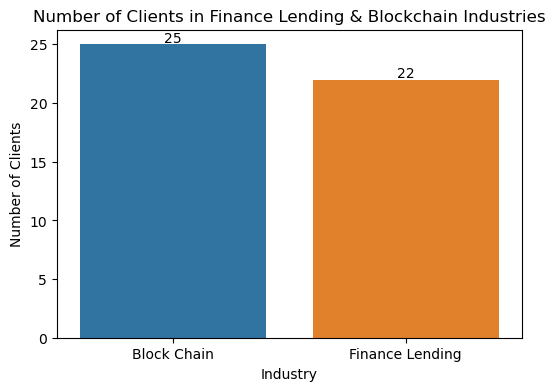

Total Target Clients (Finance + Blockchain): 47

Breakdown:
Block Chain        25
Finance Lending    22
Name: industry, dtype: int64


In [141]:
# Filter the dataset for required industries
target_industries = ['Finance Lending', 'Block Chain']
filtered_clients = industry_df[industry_df['industry'].isin(target_industries)]

# Count number of clients in each industry
industry_counts = filtered_clients['industry'].value_counts()

# Plotting the result
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=industry_counts.index, y=industry_counts.values)

# Add renewal rate labels on top of bars
for i, v in enumerate(industry_counts.values):
    ax.text(i, v+0.2, str(v), ha='center', fontsize=10)
    
plt.title("Number of Clients in Finance Lending & Blockchain Industries")
plt.xlabel("Industry")
plt.ylabel("Number of Clients")
plt.show()

# Print count values for report
total_clients = industry_counts.sum()
print("Total Target Clients (Finance + Blockchain):", total_clients)
print("\nBreakdown:")
print(industry_counts)


**Question 2: Which industry in the organization has the highest renewal rate?**

**Approach:**

1. Will Merge datastes: subscription_df + industry_df on `clients_id`
2. Group by industry and calculate:<br>
Revenew Rate = (Number of Renewed Clients/Total Clients in that Industry)
3. Sort industries by renewal rate
4. Visualize using a bar plot with value labels

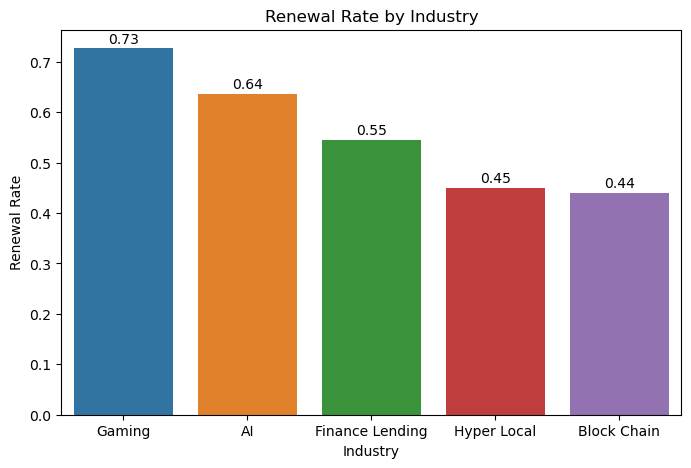

The industry with the highest renewal rate is Gaming with 0.73


In [148]:
# Merge subscription and industry data on client_id
merged = pd.merge(subscription_df, industry_df, on='client_id')

# Group by industry and calculate average of 'renewed' (which gives the renewal rate)
renewal_rate = merged.groupby('industry')['renewed'].mean().sort_values(ascending=False)

# Plot using seaborn with value labels
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=renewal_rate.index, y=renewal_rate.values)

# Add renewal rate labels on top of bars
for i, v in enumerate(renewal_rate.values):
    ax.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=10)

plt.title("Renewal Rate by Industry")
plt.xlabel("Industry")
plt.ylabel("Renewal Rate")
plt.show()

# Display the industry with the highest renewal rate
top_industry = renewal_rate.idxmax()
top_rate = renewal_rate.max()

print(f"The industry with the highest renewal rate is {top_industry} with {top_rate:.2f}")

**Question 3: What was the average inflation rate when their subscriptions were renewed?**

**Approach:**
1. From `subscription_df`, filter rows where `renewed == True`
2. For each renewed subscription, find the matching row in `financial_df` where:<br>
The subscription's `start_date` (or `end_date`) falls between the financial `start_date` and `end_date`
3. From those matched financial periods, get the `inflation_rate`
4. Calculate the average inflation rate for all renewed subscriptions

In [153]:
# Keep only the subscriptions that were renewed
renewed_data = subscription_df[subscription_df['renewed'] == True].copy()

# Add a new column to store matching inflation rates
renewed_data['inflation_rate'] = None

# Go through each renewed subscription and find its matching finanical period
for i in renewed_data.index:
    sub_date = renewed_data.loc[i, 'start_date']  # get the subscription start date

    # Find where this date fits in the finanical period
    match = finanical_df[
        (finanical_df['start_date'] <= sub_date) &
        (finanical_df['end_date'] >= sub_date)
    ]

    # If we find a match, save the inflation rate
    if not match.empty:
        renewed_data.at[i, 'inflation_rate'] = match.iloc[0]['inflation_rate']

# Make sure inflation_rate is treated as a number
renewed_data['inflation_rate'] = pd.to_numeric(renewed_data['inflation_rate'])

# Calculate the average inflation rate
average_inflation = renewed_data['inflation_rate'].mean()

# Print the result
print("Average inflation rate during renewals:", round(average_inflation, 2), "%")

# Show a few sample rows
print(renewed_data[['client_id', 'start_date', 'inflation_rate']].head())


Average inflation rate during renewals: 4.44 %
    client_id  start_date  inflation_rate
1  4309371709  2021-05-24            0.76
2  3183675157  2021-12-25            7.32
3  5371694837  2020-03-14            4.40
5  7896208406  2022-02-24            6.76
6  4687291312  2019-06-14            3.84


- **`.copy()`**: Makes a separate copy of the data so changes don’t affect the original.
- **`.loc[]`**: Lets us get or update values using labels (like column names).
- **`.iloc[]`**: Lets us get values using row numbers (positions).

**Question 4: What is the median amount paid each year for all payment methods?**

**Approach:**
1. Use the `payments_df` dataset
2. Extract year from the `payment_date` column
3. Group by `year` and `payment_method`
4. Calculate the median of `amount_paid` for each group
5. Visualize using a grouped bar plot by year & payment method

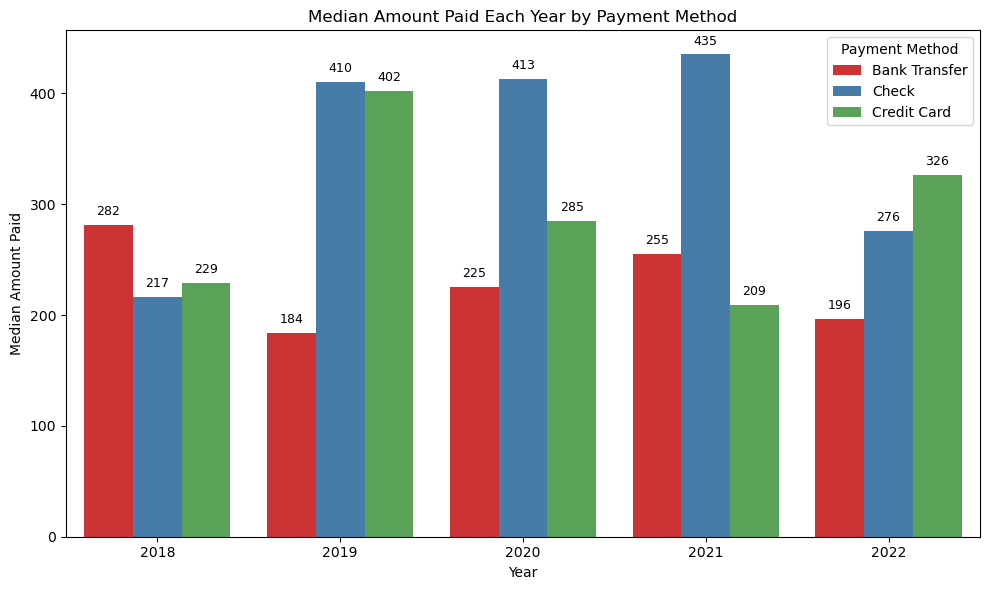

In [177]:
# Add a new column to extract the year from payments_date
payments_df['year'] = payments_df['payment_date'].dt.year

# Group by year and payments method, then find the median amount paid
median_by_year = payments_df.groupby(['year', 'payment_method'])['amount_paid'].median().reset_index()

# Set the size of the chart
plt.figure(figsize=(10, 6))

# Create the barplot
ax = sns.barplot(
    data=median_by_year,
    x='year',
    y='amount_paid',
    hue='payment_method',
    palette='Set1'
)

# Add value labels on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.0f}',  # value rounded to 0 decimals
                xy=(bar.get_x() + bar.get_width() / 2, height),  # label position
                xytext=(0, 5),  # offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=9)

# Set labels and title
plt.title("Median Amount Paid Each Year by Payment Method")
plt.xlabel("Year")
plt.ylabel("Median Amount Paid")
plt.legend(title="Payment Method")
plt.tight_layout()
plt.show()

Adding a separate `year` column makes it easy to group and compare payments by year. It also makes the chart cleaner and the x-axis labels clearer.

Below are the median payment amounts made by clients for each payment method, year by year:

| Year | Payment Method | Median Amount Paid |
|------|----------------|--------------------|
| 2018 | Bank Transfer  | 282                |
| 2018 | Check          | 217                |
| 2018 | Credit Card    | 229                |
| 2019 | Bank Transfer  | 184                |
| 2019 | Check          | 410                |
| 2019 | Credit Card    | 402                |
| 2020 | Bank Transfer  | 225                |
| 2020 | Check          | 413                |
| 2020 | Credit Card    | 285                |
| 2021 | Bank Transfer  | 255                |
| 2021 | Check          | 435                |
| 2021 | Credit Card    | 209                |
| 2022 | Bank Transfer  | 196                |
| 2022 | Check          | 276                |
| 2022 | Credit Card    | 326                |